In [ ]:
# 📦 Imports and Config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier feeature_importances 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os

WINDOW = 30
LABELS = [0, 1, 2, 3, 4]  # Wake, N1, N2, N3, REM

In [ ]:
df = pd.read_csv('/Users/veeralpatel/ECE284FinalProject/data/S002_PSG_df_updated.csv', usecols=[
    'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR', 'Sleep_Stage'
])

stage_map = {
    "W": 0,
    "N1": 1,
    "N2": 2,
    "N3": 3,
    "R": 4
}

df = df_raw.copy()
df['Sleep_Stage'] = df['Sleep_Stage'].map(stage_map)
df = df.dropna(subset=['Sleep_Stage'])
df['Sleep_Stage'] = df['Sleep_Stage'].astype(int)

In [ ]:
features = []
labels = []

for i in range(0, len(df) - WINDOW, WINDOW):
    segment = df.iloc[i:i + WINDOW]
    vm = np.sqrt(segment['ACC_X']**2 + segment['ACC_Y']**2 + segment['ACC_Z']**2)
    features.append({
        'acc_mean': vm.mean(),
        'acc_std': vm.std(),
        'temp_mean': segment['TEMP'].mean(),
        'eda_mean': segment['EDA'].mean(),
        'hr_mean': segment['HR'].mean(),
    })
    labels.append(segment['Sleep_Stage'].mode()[0])

print("Total rows after cleaning:", len(df))
print("Sleep stage counts:\n", df['Sleep_Stage'].value_counts())

X = pd.DataFrame(features)
y = labels
X.head()

Total rows after cleaning: 1964127
Sleep stage counts:
 Sleep_Stage
2    990000
0    662997
1    159000
4    152130
Name: count, dtype: int64


,acc_mean,acc_std,temp_mean,eda_mean,hr_mean
0,65.451241,1.130342,32.090000,0.065662,72.850
1,65.383807,0.636087,32.090000,0.065491,72.850
2,65.385680,0.504692,32.090000,0.064808,72.850
3,65.328152,0.414253,32.105333,0.065320,73.218
4,65.282113,0.340882,32.110000,0.065320,73.330


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Total rows after cleaning: 1964127
Sleep stage counts:
 Sleep_Stage
2    990000
0    662997
1    159000
4    152130
Name: count, dtype: int64


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      4423
           1       0.27      0.13      0.17      1041
           2       0.66      0.81      0.73      6611
           4       0.20      0.08      0.11      1019

    accuracy                           0.61     13094
   macro avg       0.43      0.39      0.39     13094
weighted avg       0.57      0.61      0.58     13094



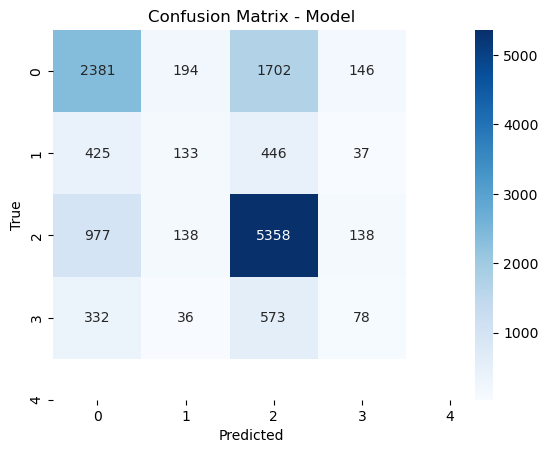

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model')
plt.show()

In [ ]:
results = {}
X_acc = X[['acc_mean', 'acc_std']]
X_train, X_test, y_train, y_test = train_test_split(X_acc, y, test_size=0.2)
model_acc = RandomForestClassifier().fit(X_train, y_train)
y_pred = model_acc.predict(X_test)
report_acc = classification_report(y_test, y_pred, output_dict=True)
results['ACC only'] = report_acc['macro avg']['f1-score']


In [27]:
X_temp = X[['temp_mean']]
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2)
model_temp = RandomForestClassifier().fit(X_train, y_train)
y_pred = model_temp.predict(X_test)
report_temp = classification_report(y_test, y_pred, output_dict=True)
results['TEMP only'] = report_temp['macro avg']['f1-score']

In [28]:
X_hr = X[['hr_mean']]
X_train, X_test, y_train, y_test = train_test_split(X_hr, y, test_size=0.2)
model_hr = RandomForestClassifier().fit(X_train, y_train)
y_pred = model_hr.predict(X_test)
report_hr = classification_report(y_test, y_pred, output_dict=True)
results['HR only'] = report_hr['macro avg']['f1-score']

Unimodal vs. Fusion Model Performance (Macro F1 Score):


,Macro F1 Score
TEMP only,0.57
ACC only,0.47
HR only,0.39


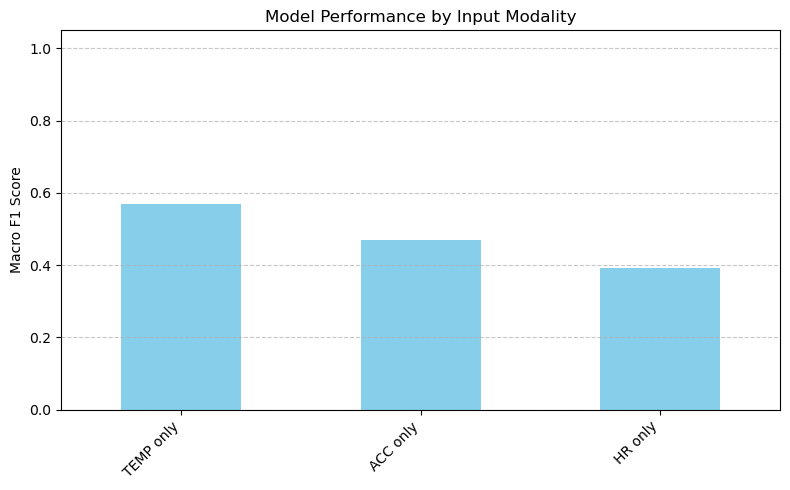

In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Macro F1 Score'])
df_results = df_results.sort_values(by='Macro F1 Score', ascending=False)
display(df_results.style.background_gradient(cmap='Blues').format("{:.2f}"))
plt.figure(figsize=(8, 5))
df_results['Macro F1 Score'].plot(kind='bar', color=['skyblue' if 'Fusion' not in idx else 'steelblue' for idx in df_results.index])
plt.title("Model Performance by Input Modality")
plt.ylabel("Macro F1 Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
features = ['Mean Temp', 'Std Temp', 'Skewness', 'Kurtosis', 'Max Temp']
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:5]
top_features = [features[i] for i in indices]
top_importances = importances[indices]
plt.figure(figsize=(6, 3.5))
plt.barh(top_features[::-1], top_importances[::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Features: Temperature Modality')
plt.tight_layout()
plt.savefig('feature_importance_temp.pdf')


NameError: name 'model' is not defined